In [1]:
import os
import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from skimage.metrics import structural_similarity as ssim
import tensorflow as tf

In [2]:
df_img_info = pd.read_csv('img_info.csv')
df_sal_info = pd.read_csv('sal_info.csv')

Traitement

In [3]:
# pour les images
# Groupe by par Model 
model_img = df_img_info.groupby(df_img_info.Model)
# img_MV2 = model_img.get_group('MobileNetV2')
img_VGG16 = model_img.get_group('VGG16')
# img_ResNet = model_img.get_group('ResNet152V2')

# Groupe by par attaque sur les modèles
# attaque_img_MV2 = img_MV2.groupby(["Attaque"])
# img_MV2_PGD = attaque_img_MV2.get_group('PGD')
# img_MV2_FGSM = attaque_img_MV2.get_group('FGSM')

attaque_img_VGG16 = img_VGG16.groupby(["Attaque"])
img_VGG16_PGD = attaque_img_VGG16.get_group('PGD')
# img_VGG16_FGSM = attaque_img_VGG16.get_group('FGSM')

# attaque_img_ResNet = img_ResNet.groupby(["Attaque"])
# img_ResNet_PGD = attaque_img_ResNet.get_group('PGD')
# img_ResNet_FGSM = attaque_img_ResNet.get_group('FGSM')


In [4]:
# pour les saillance
# Groupe by par Model 
model_sal = df_sal_info.groupby(df_sal_info.Model)
# sal_MV2 = model_sal.get_group('MobileNetV2')
sal_VGG16 = model_sal.get_group('VGG16')
# sal_ResNet = model_sal.get_group('ResNet152V2')

# Groupe by par attaque sur les modèles
# attaque_sal_MV2 = sal_MV2.groupby(["Attaque"])
# sal_MV2_PGD = attaque_sal_MV2.get_group('PGD')
# sal_MV2_FGSM = attaque_sal_MV2.get_group('FGSM')

attaque_sal_VGG16 = sal_VGG16.groupby(["Attaque"])
sal_VGG16_PGD = attaque_sal_VGG16.get_group('PGD')
# sal_VGG16_FGSM = attaque_sal_VGG16.get_group('FGSM')

# attaque_sal_ResNet = sal_ResNet.groupby(["Attaque"])
# sal_ResNet_PGD = attaque_sal_ResNet.get_group('PGD')
# sal_ResNet_FGSM = attaque_sal_ResNet.get_group('FGSM')

In [ ]:
Toutes les Analyses de métriques

In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle('MobileNetV2 et attaque PGD sur les images')
# ax1.scatter(img_MV2_PGD["Objet"],img_MV2_PGD["Difference absolue"])
# ax1.set_ylabel("Diff abs")
# ax2.scatter(img_MV2_PGD["Objet"],img_MV2_PGD["MSE"], c = 'red')
# ax2.set_ylabel("MSE")
# ax3.scatter(img_MV2_PGD["Objet"],img_MV2_PGD["Coef de corrélation"], c = 'green')
# ax3.set_ylabel("Coef de corr")
# ax4.scatter(img_MV2_PGD["Objet"],img_MV2_PGD["SSIM"], c = 'purple')
# ax4.set_ylabel("SSIM")

# for ax in (ax1, ax2,ax3,ax4):
#     ax.tick_params(axis='x', rotation=60)

# plt.subplots_adjust(hspace=0.7)
# plt.subplots_adjust(wspace=0.5)


In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle('MobileNetV2 et attaque FGSM sur les images')
# ax1.scatter(img_MV2_FGSM["Objet"],img_MV2_FGSM["Difference absolue"])
# ax1.set_ylabel("Diff abs")
# ax2.scatter(img_MV2_FGSM["Objet"],img_MV2_FGSM["MSE"], c = 'red')
# ax2.set_ylabel("MSE")
# ax3.scatter(img_MV2_FGSM["Objet"],img_MV2_FGSM["Coef de corrélation"], c = 'green')
# ax3.set_ylabel("Coef de corr")
# ax4.scatter(img_MV2_FGSM["Objet"],img_MV2_FGSM["SSIM"], c = 'purple')
# ax4.set_ylabel("SSIM")

# for ax in (ax1, ax2,ax3,ax4):
#     ax.tick_params(axis='x', rotation=60)

# plt.subplots_adjust(hspace=0.7)
# plt.subplots_adjust(wspace=0.5)


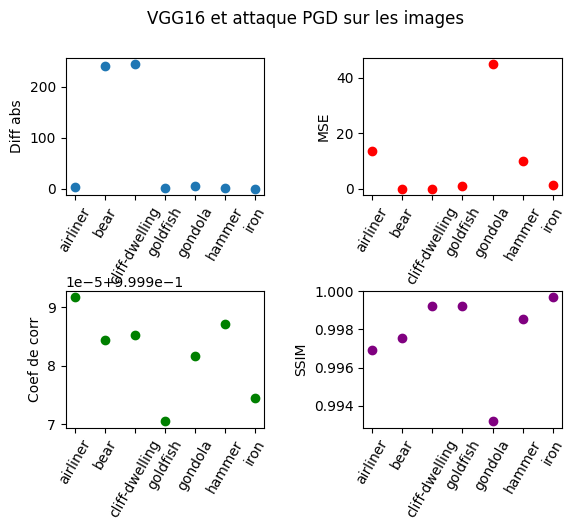

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('VGG16 et attaque PGD sur les images')
ax1.scatter(img_VGG16_PGD["Objet"],img_VGG16_PGD["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(img_VGG16_PGD["Objet"],img_VGG16_PGD["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(img_VGG16_PGD["Objet"],img_VGG16_PGD["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(img_VGG16_PGD["Objet"],img_VGG16_PGD["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle('VGG16 et attaque FGSM sur les images')
# ax1.scatter(img_VGG16_FGSM["Objet"],img_VGG16_FGSM["Difference absolue"])
# ax1.set_ylabel("Diff abs")
# ax2.scatter(img_VGG16_FGSM["Objet"],img_VGG16_FGSM["MSE"], c = 'red')
# ax2.set_ylabel("MSE")
# ax3.scatter(img_VGG16_FGSM["Objet"],img_VGG16_FGSM["Coef de corrélation"], c = 'green')
# ax3.set_ylabel("Coef de corr")
# ax4.scatter(img_VGG16_FGSM["Objet"],img_VGG16_FGSM["SSIM"], c = 'purple')
# ax4.set_ylabel("SSIM")

# for ax in (ax1, ax2,ax3,ax4):
#     ax.tick_params(axis='x', rotation=60)

# plt.subplots_adjust(hspace=0.7)
# plt.subplots_adjust(wspace=0.5)

In [ ]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# fig.suptitle('ResNet et attaque PGD sur les images')
# ax1.scatter(img_ResNet_PGD["Objet"],img_VGG16_FGSM["Difference absolue"])
# ax1.set_ylabel("Diff abs")
# ax2.scatter(img_ResNet_PGD["Objet"],img_VGG16_FGSM["MSE"], c = 'red')
# ax2.set_ylabel("MSE")
# ax3.scatter(img_ResNet_PGD["Objet"],img_VGG16_FGSM["Coef de corrélation"], c = 'green')
# ax3.set_ylabel("Coef de corr")
# ax4.scatter(img_ResNet_PGD["Objet"],img_VGG16_FGSM["SSIM"], c = 'purple')
# ax4.set_ylabel("SSIM")

# for ax in (ax1, ax2,ax3,ax4):
#     ax.tick_params(axis='x', rotation=60)

# plt.subplots_adjust(hspace=0.7)
# plt.subplots_adjust(wspace=0.5)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('ResNet et attaque FGSM sur les images')
ax1.scatter(img_ResNet_FGSM["Objet"],img_ResNet_FGSM["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(img_ResNet_FGSM["Objet"],img_ResNet_FGSM["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(img_ResNet_FGSM["Objet"],img_ResNet_FGSM["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(img_ResNet_FGSM["Objet"],img_ResNet_FGSM["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque PGD sur les cartes de Saillance')
ax1.scatter(sal_MV2_PGD["Objet"],sal_MV2_PGD["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(sal_MV2_PGD["Objet"],sal_MV2_PGD["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(sal_MV2_PGD["Objet"],sal_MV2_PGD["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(sal_MV2_PGD["Objet"],sal_MV2_PGD["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque FGSM sur les cartes de Saillance')
ax1.scatter(sal_MV2_FGSM["Objet"],sal_MV2_FGSM["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(sal_MV2_FGSM["Objet"],sal_MV2_FGSM["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(sal_MV2_FGSM["Objet"],sal_MV2_FGSM["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(sal_MV2_FGSM["Objet"],sal_MV2_FGSM["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

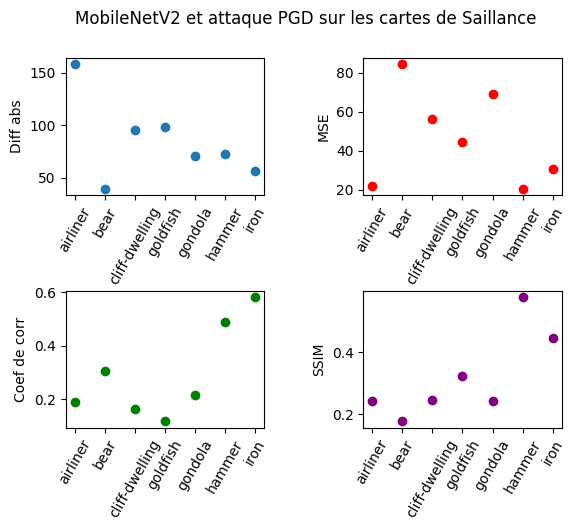

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque PGD sur les cartes de Saillance')
ax1.scatter(sal_VGG16_PGD["Objet"],sal_VGG16_PGD["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(sal_VGG16_PGD["Objet"],sal_VGG16_PGD["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(sal_VGG16_PGD["Objet"],sal_VGG16_PGD["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(sal_VGG16_PGD["Objet"],sal_VGG16_PGD["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque FGSM sur les cartes de Saillance')
ax1.scatter(sal_VGG16_FGSM["Objet"],sal_VGG16_FGSM["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(sal_VGG16_FGSM["Objet"],sal_VGG16_FGSM["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(sal_VGG16_FGSM["Objet"],sal_VGG16_FGSM["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(sal_VGG16_FGSM["Objet"],sal_VGG16_FGSM["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque PGD sur les cartes de Saillance')
ax1.scatter(sal_ResNet_PGD["Objet"],sal_ResNet_PGD["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(sal_ResNet_PGD["Objet"],sal_ResNet_PGD["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(sal_ResNet_PGD["Objet"],sal_ResNet_PGD["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(sal_ResNet_PGD["Objet"],sal_ResNet_PGD["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque FGSM sur les cartes de Saillance')
ax1.scatter(sal_ResNet_FGSM["Objet"],sal_ResNet_FGSM["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(sal_ResNet_FGSM["Objet"],sal_ResNet_FGSM["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(sal_ResNet_FGSM["Objet"],sal_ResNet_FGSM["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(sal_ResNet_FGSM["Objet"],sal_ResNet_FGSM["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

Graphiques du taux de confiance selon l'intensité de l'attaque

In [43]:
df_score = pd.pivot_table(img_VGG16_PGD, index="Intensité", values=["Score"], aggfunc={"Score": np.mean})

KeyError: 1

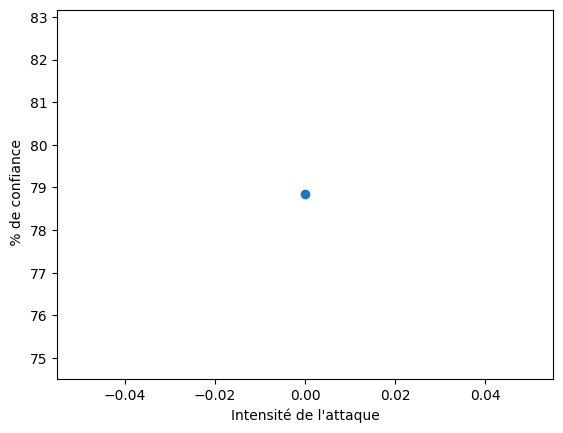

In [79]:
epsilons = [0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0]
for i in range(len(epsilons)):
    plt.scatter(epsilons[i],df_score['Score'][i]/10000)
    plt.xlabel("Intensité de l'attaque")
    plt.ylabel(" % de confiance")



<AxesSubplot: ylabel='Intensité'>

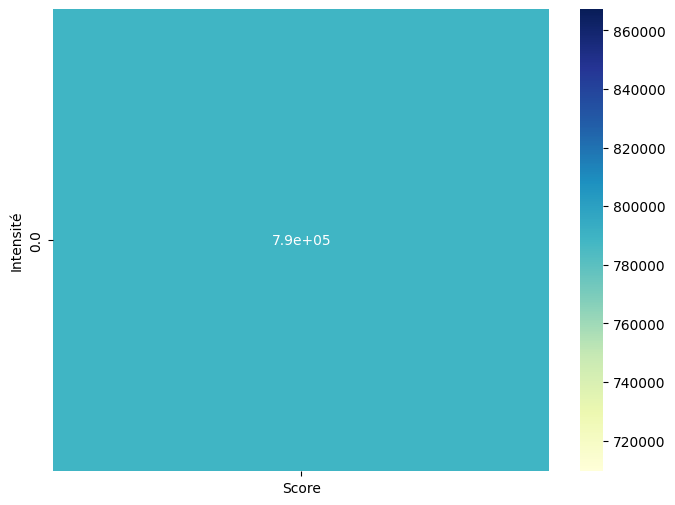

In [47]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df_score, annot=True, cmap='YlGnBu')